# IBM Advanced Data Science Capstone project.

# Forecasting a Stock Price | Prediction Models for Amazon.com

### Analysis using linear models such as Linear Regression, K-Nearest Neighbor(KNN) and Support Vector Machine(SVM) to using a Time Series Forcasting model like RNN-LSTM meaning Recurrent Neural Network Long Short Term Memory.

### RNN - LSTM - Time Series Forecasting  Model.

#### The Goal:

In [3]:
print('Working with the historical Data of the company name Amazon.com, which has its equity or stock that trades in the NASDAQ market under the symbol AMZN, my goal is to see how well the LSTM model can predict the stock price movements.')

Working with the historical Data of the company name Amazon.com, which has its equity or stock that trades in the NASDAQ market under the symbol AMZN, my goal is to see how well the LSTM model can predict the stock price movements.


#### In this analysis the question is can the LSTM-Time Series Model do well in predicting the stock performance?

#### Install and Import Libraries:

In [1]:
# For model builing
!pip install tensorflow==2.2.0rc0

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 515.9 MB 39 kB/s s eta 0:00:01
     |████████████████████████████████| 26.1 MB 48.1 MB/s eta 0:00:01
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.0
    Uninstalling scipy-1.5.0:
      Successfully uninstalled scipy-1.5.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.1.0


    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


In [2]:
# for model building
import tensorflow as tf
if not tf.__version__ == '2.2.0-rc0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.2.0-rc0, or restart your Kernel (Kernel->Restart & Clear Output)')

In [3]:
# for model building
!pip install keras

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [4]:
# for ETL
import numpy as np
import pandas as pd
import math
from math import sqrt

In [5]:
#for metrics and scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [6]:
#for model building and compiling
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping

In [7]:
# for webscraping
!pip install yfinance

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=02933f72ec193ac24376e2e31bb5a160b45cf345f2e0aa921339baa631cdcff1
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/26/af/8b/fac1b47dffef567f945641cdc9b67bb25fae5725d462a8cf81
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=e10b4681eb8d3c4e903d6dc9fbe108e1bcaf7abf0977ab9b66ed105b97ed6934
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Succ

In [8]:
#for webscraping
import yfinance as yf 

In [9]:
#for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Using LSTM - Time Series Forecasting to make stock prediction

In [1]:
print("LSTM Time Series Forecasting is a deep learning model.  LSTM stands for Long-Short-Term Memory.  It is a Recurrent Neural Network of deep Learning algorithms in Machine Learning which can be used for Time Series Forcasting in Predictive modeling.")

LSTM Time Series Forecasting is a deep learning model.  LSTM stands for Long-Short-Term Memory.  It is a Recurrent Neural Network of deep Learning algorithms in Machine Learning which can be used for Time Series Forcasting in Predictive modeling.


## Module 5: Model Definition

### Getting the dataset for Training

In [12]:
# Working with AMAZON.COM  
#Total data set starts '2009-04-01' ends '2021-03-31'(3020,7)
#Train data set starts '2009-04-01' ends '2018-03-31'(1812,7)
#Test data set starts '2018-04-01' ends '2021-03-31'(755,7)
#validation data is set at 20 percent (453,7)

ticker = yf.Ticker("AMZN")
data1 = ticker.history(start = "2009-04-01", end = "2021-03-31")
data1.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-04-01,73.019997,75.089996,71.709999,73.500000,7041400,0,0
2009-04-02,73.629997,77.239998,73.440002,76.339996,11066900,0,0
2009-04-03,76.419998,78.320000,75.500000,78.169998,5809900,0,0
2009-04-06,77.260002,78.360001,76.000000,77.989998,5751300,0,0
2009-04-07,76.970001,77.080002,74.879997,75.510002,5748800,0,0


In [13]:
data1.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-24,3151.040039,3160.310059,3085.149902,3087.070068,2959000,0,0
2021-03-25,3072.989990,3109.780029,3037.139893,3046.260010,3563500,0,0
2021-03-26,3044.060059,3056.659912,2996.000000,3052.030029,3306700,0,0
2021-03-29,3055.439941,3091.250000,3028.449951,3075.729980,2746000,0,0
2021-03-30,3070.010010,3073.000000,3034.000000,3055.290039,2337600,0,0


In [14]:
data1.shape

(3020, 7)

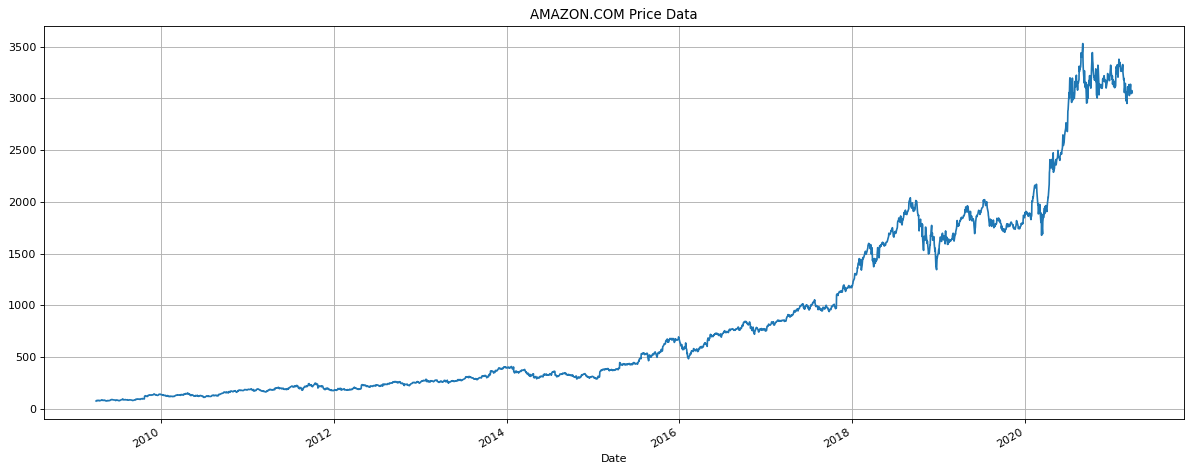

In [15]:
# Sorting the dataframe as per date
data1.sort_values('Date', inplace=True, ascending=True)
# The steep drop for covid-19 was in March of 2020. 
#Visualize the data
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
data1['Close'].plot()
plt.title("AMAZON.COM Price Data")
plt.tight_layout()
plt.grid()
plt.show()

In [16]:
print("This dataset has 7 columns, the dividends and the stock split colunms are not necessary for this process.")

This dataset has 7 columns, the dividends and the stock split colunms are not necessary for this process.


In [17]:
# Data cleaning # Removing dividends column and stock split column
data1['Date'] = data1.index
df = pd.DataFrame(columns = ['Open', 'High', 'Low', 'Close','Volume'])
df['Open'] = data1['Open']
df['High'] = data1['High']
df['Low'] = data1['Low']
df['Close'] = data1['Close']
df['Volume']= data1['Volume']

In [18]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2009-04-01,73.019997,75.089996,71.709999,73.500000,7041400
2009-04-02,73.629997,77.239998,73.440002,76.339996,11066900
2009-04-03,76.419998,78.320000,75.500000,78.169998,5809900
2009-04-06,77.260002,78.360001,76.000000,77.989998,5751300
2009-04-07,76.970001,77.080002,74.879997,75.510002,5748800


## Module 6: Model Development

### Create a Dataset for the LSTM model 

In [19]:
print('Preparing the dataset for training purpose. 25 percent is set aside for the test data')

Preparing the dataset for training purpose. 25 percent is set aside for the test data


In [20]:
#Get close data
training_set = [['Close']].copy()

In [21]:
# Split dataset into train and test
training_set = df.iloc[0:-755].values
test_set = df.iloc[-755:len(df)]
print(len(training_set), len(test_set))

2265 755


In [22]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [23]:
# Creating a data stucture of 50 time_steps and 1 output
X_train = []
y_train = []
for i in range (50,len(training_set)):
    X_train.append(training_set_scaled[i-50:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

    
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    

## Modele 7 & 8: Building & Evaluating Models

### Creating and Training the LSTM model

In [24]:
print("From the training data set I have written an automatic set up for a 20 percent validation split so later I could visualize how the losses fit over the epochs.")

From the training data set I have written an automatic set up for a 20 percent validation split so later I could visualize how the losses fit over the epochs.


In [25]:
# Define the Lstm model
lstm_model = Sequential()
lstm_model.add(LSTM(units = 200, return_sequences = True, input_shape = (X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.summary()

# Model Training 
# Compile
history = lstm_model.fit(X_train, y_train, epochs=50, validation_split=0.20, batch_size=32, shuffle=False)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 200)           161600    
_________________________________________________________________
dropout (Dropout)            (None, 50, 200)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                50200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 211,851
Trainable params: 211,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
56/56 [==============================] - 14s 243ms/step - loss: 6.3986e-04 - val_loss: 0.0058
Epoch 2/50


In [26]:
history

#### Model Evaluation

#### Post-training, plot the loss as:

In [27]:
print('Evaluation of how the model has trained over the epochs')

Evaluation of how the model has trained over the epochs


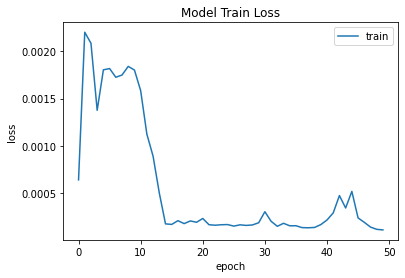

In [28]:
# Plot Model train loss over the epoch
plt.plot(history.history['loss'])
plt.title('Model Train Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train']);
plt.show()

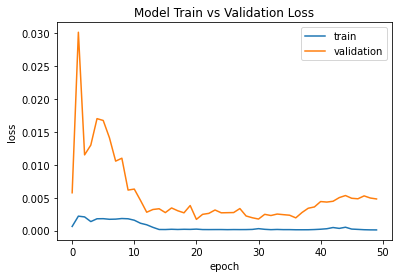

In [29]:
# Plot train and validation loss ove epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Train vs Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation']);
plt.show()

In [31]:
print('It appears that the model has trained ok but there is a lot of ripples in the validation set. By the 40th epoch the validation and training loss over the epoch have reduced. However as I continued to rerunned the file to continue the work, the model has been taking longer to train and the loss over the epochs have been widening as you can see on the chart above.')

It appears that the model has trained ok but there is a lot of ripples in the validation set. By the 40th epoch the validation and training loss over the epoch have reduced. However as I continued to rerunned the file to continue the work, the model has been taking longer to train and the loss over the epochs have been widening as you can see on the chart above.


#### Model Deployment

###### Prepare the test data

In [32]:
# Get the test data prices start '2018-04-01' end '2021-03-31'
#set period =  from April 01 of 2018 to March 31 of 2021
ticker = yf.Ticker("AMZN")
data_test = ticker.history(start = "2018-04-01", end = "2021-03-31")
data_test.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-02,1417.619995,1421.359985,1355.000000,1371.989990,10463600,0,0
2018-04-03,1391.380005,1414.000000,1355.329956,1392.050049,10231200,0,0
2018-04-04,1358.239990,1415.390015,1352.880005,1410.569946,6982300,0,0
2018-04-05,1441.989990,1459.560059,1427.069946,1451.750000,6413500,0,0
2018-04-06,1429.969971,1452.500000,1400.260010,1405.229980,5882300,0,0


In [33]:
data_test.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-24,3151.040039,3160.310059,3085.149902,3087.070068,2959000,0,0
2021-03-25,3072.989990,3109.780029,3037.139893,3046.260010,3563500,0,0
2021-03-26,3044.060059,3056.659912,2996.000000,3052.030029,3306700,0,0
2021-03-29,3055.439941,3091.250000,3028.449951,3075.729980,2746000,0,0
2021-03-30,3070.010010,3073.000000,3034.000000,3055.290039,2337600,0,0


In [34]:
data_test.shape

(755, 7)

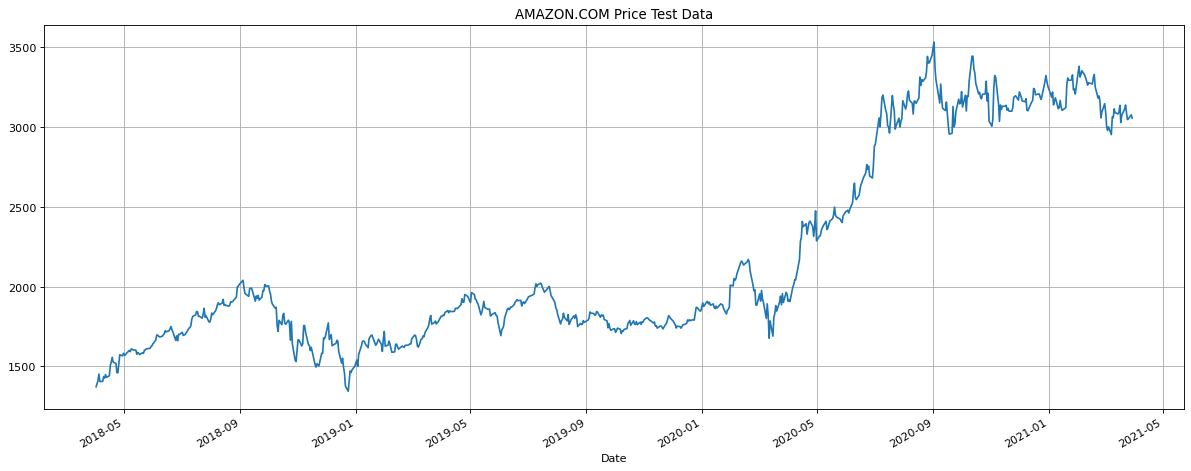

In [35]:
# The steep drop for covid-19 was in March of 2020. 
#Visualize the data
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
data_test['Close'].plot()
plt.title("AMAZON.COM Price Test Data")
plt.tight_layout()
plt.grid()
plt.show()

In [36]:
# Data cleaning # Removing dividends column and stock split column
data_test['Date'] = data_test.index
df_test = pd.DataFrame(columns = ['Open', 'High', 'Low', 'Close','Volume'])
df_test['Open'] = data_test['Open']
df_test['High'] = data_test['High']
df_test['Low'] = data_test['Low']
df_test['Close'] = data_test['Close']
df_test['Volume']= data_test['Volume']
df_test.shape

(755, 5)

###### Reshaping the data: 

In [37]:
real_stock_price = df_test.iloc[:, 1:2].values

In [38]:
dataset_total = pd.concat((df['Open'], df_test['Open']), axis = 0) 

In [39]:
inputs = dataset_total[len(dataset_total) - len(df_test) - 50:].values 

In [40]:
inputs = inputs.reshape(-1, 1)
inputs = sc.fit_transform(inputs)
X_test = []
for i in range(50, inputs.shape[0]):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

(755, 50, 1)


### Make Prediction using test set

In [41]:
# Predict the price with the model
predicted_stock_price = lstm_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualizing the results

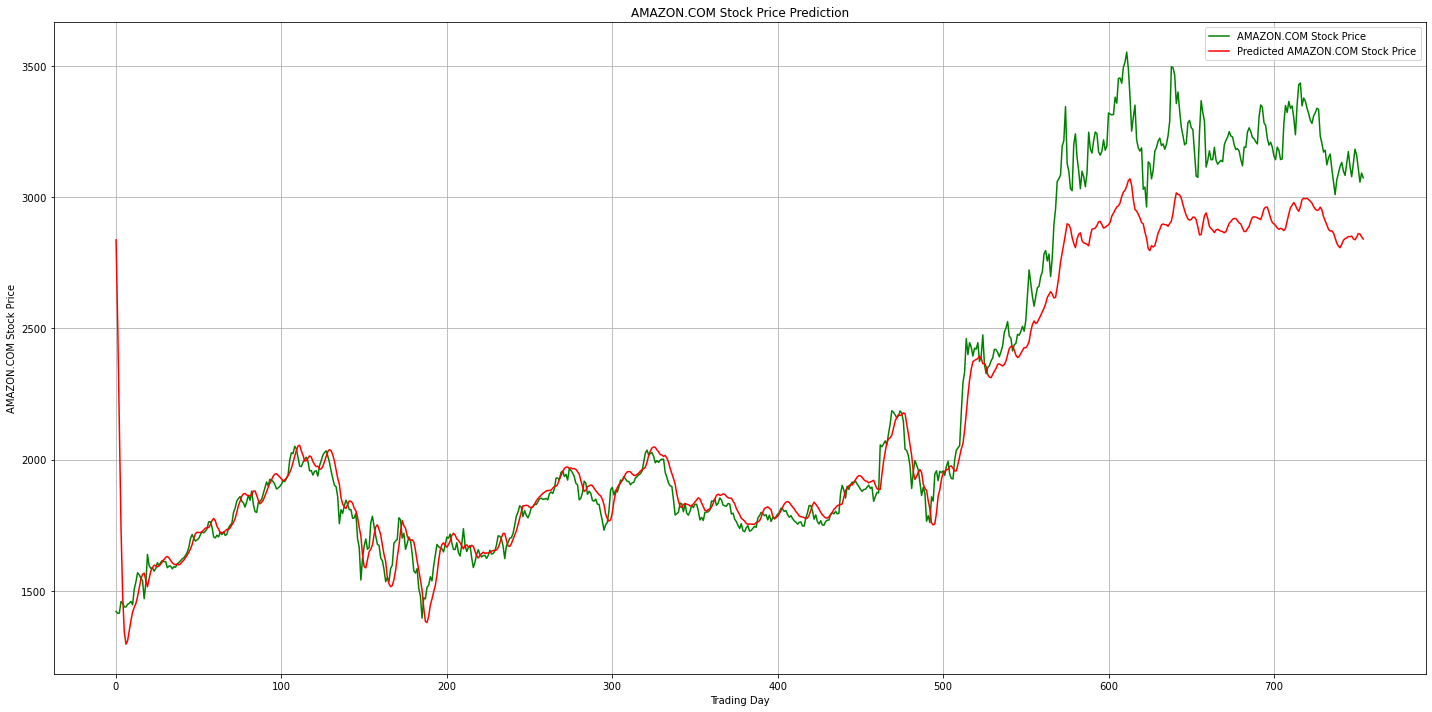

In [42]:
#visualize the results
plt.figure(figsize = (20,10))
plt.plot(real_stock_price, color = 'green', label = 'AMAZON.COM Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted AMAZON.COM Stock Price')
plt.title('AMAZON.COM Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('AMAZON.COM Stock Price')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

## Module 9: Report Model Performance 

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [44]:
lstm_mse=math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('LSTM Model root mean square error', lstm_mse)

LSTM Model root mean square error 186.0728774117609


In [45]:
lstm_R2=r2_score(real_stock_price, predicted_stock_price)
print('LSTM Model R2 score', lstm_R2)

LSTM Model R2 score 0.911753314248435


In [46]:
lstm_mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print('LSTM Model Mean Absolute Error', lstm_mae)

LSTM Model Mean Absolute Error 116.32627308826572


### Saving The Model:

In [47]:
lstm_model.save("copy2_saved_model.h5")

#### Report the Metrics Results or Model Performance

In [48]:
print('LSTM Model root mean square error', lstm_mse)
print('LSTM Model R2 score', lstm_R2)
print('LSTM Model Mean Absolute Error', lstm_mae)

LSTM Model root mean square error 186.0728774117609
LSTM Model R2 score 0.911753314248435
LSTM Model Mean Absolute Error 116.32627308826572


## Observation:

In [50]:
print('I selected the above metrics to evaluate the model performance because they do well with the predictive analysis.  The R2 may show you a better overall indication of how this deep learning model has performed in reference to the Actual Stock Price.  Looking at the visualization plot you can see that the model performed as well as the actual stock price from the beginning of the test data until the Covid-19 correction.  After that the actual stock price performed better.  In my view the model works well because it did not lose money but compared to the actual price after the Covid-19 droped, it lagged.  It would not have lost any money.  Based on what we see above a market participant would have done very well because the actual stock price  did better than the model.') 

I selected the above metrics to evaluate the model performance because they do well with the predictive analysis.  The R2 may show you a better overall indication of how this deep learning model has performed in reference to the Actual Stock Price.  Looking at the visualization plot you can see that the model performed as well as the actual stock price from the beginning of the test data until the Covid-19 correction.  After that the actual stock price performed better.  In my view the model works well because it did not lose money but compared to the actual price after the Covid-19 droped, it lagged.  It would not have lost any money.  Based on what we see above a market participant would have done very well because the actual stock price  did better than the model.


###### Can I improve model performance?

###### From compiling the LSTM different in the next file which is a copy of this file with a different version of model building I found out that by increasing the epochs I get a bettet fit in loss over epoch but when evaluating that model the performance was not as good as this one.

In [2]:
print("On the next file I compiled my LSTM differently to see if I improved the model and the answer is no therefore this model is my valid RNN-LSTM-Time Series Forecasting model.")

On the next file I compiled my LSTM differently to see if I improved the model and the answer is no therefore this model is my valid RNN-LSTM-Time Series Forecasting model.


In [52]:
print("The End")

The End
